# 2-parameters discriminant analysis

Python notebook for constructing a Fisher disciminant from two 2D Gaussianly distributed correlated variables. The notebook creates artificial random data for two different types of processes, and the goal is then to separate these by constructing a Fisher discriminant.

### Authors: 
- Christian Michelsen (Niels Bohr Institute)
- Troels C. Petersen (Niels Bohr Institute)

### Date:    
- 9-12-2020 (latest update)

### References:
- Glen Cowan, Statistical Data Analysis, pages 51-57
- http://en.wikipedia.org/wiki/Linear_discriminant_analysis

***

In [1]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
from numpy.linalg import inv

In [2]:
r = np.random             # Random generator
r.seed(42)                # Set a random seed (but a fixed one)
save_plots = False          # For now, don't save plots (once you trust your code, switch on)

## Functions:

Function for generating a set of correlated random gaussian numbers...

In [3]:
def get_corr(mu1, sig1, mu2, sig2, rho12): 

    theta = 0.5 * np.arctan( 2.0 * rho12 * sig1 * sig2 / ( sig1**2 - sig2**2 ) )
    sigu = np.sqrt( np.abs( ((sig1*np.cos(theta))**2 - (sig2*np.sin(theta))**2 ) / ( np.cos(theta)**2 - np.sin(theta)**2) ) )
    sigv = np.sqrt( np.abs( ((sig2*np.cos(theta))**2 - (sig1*np.sin(theta))**2 ) / ( np.cos(theta)**2 - np.sin(theta)**2) ) )

    u = r.normal(0.0, sigu)
    v = r.normal(0.0, sigv)

    x = mu1 + np.cos(theta)*u - np.sin(theta)*v
    y = mu2 + np.sin(theta)*u + np.cos(theta)*v

    return x, y

Function to calculate the separation betweem two lists of numbers (see equation at the bottom of the script). __Note__: Needs to be filled in! 

In [4]:
def calc_separation(x, y):
    d = np.abs((np.mean(x) - np.mean(y))) / np.sqrt(np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2)
    return d

## Define parameters:


Number of species, their means and widths, correlations and the number of observations of each species:

In [5]:
# Number of 'species': signal / background
n_spec = 2       

# Species A, mean and width for the two dimensions/parameters
mean_A  = [15.0, 50.0] 
width_A = [ 2.0,  6.0] 

# Species B, mean and width for the two dimensions/parameters
mean_B  = [12.0, 55.0] 
width_B = [ 3.0,  6.0] 

# Coefficient of correlation
corr_A = 0.8
corr_B = 0.9

# Amount of data you want to create
n_data = 2000         

## Generate data:

For each "species", produce a number of $(x_0,x_1)$ points which are (linearly) correlated:

In [6]:
spec_A = np.zeros((n_data, n_spec))
spec_B = np.zeros((n_data, n_spec))

# Get liniarly correlated random numbers...
for iexp in range(n_data): 
    spec_A[iexp, :] = get_corr(mean_A[0], width_A[0], mean_A[1], width_A[1], corr_A)
    spec_B[iexp, :] = get_corr(mean_B[0], width_B[0], mean_B[1], width_B[1], corr_B)

__Optional__: How to rewrite the above to exclude the for loop?
__Hint__: Does any of the functions used in `get_corr` accept a parameter called `size`?

***
## Plot your generated data:

We plot the 2D-data as 1D-histograms (basically projections) in $x_0$ and $x_1$:

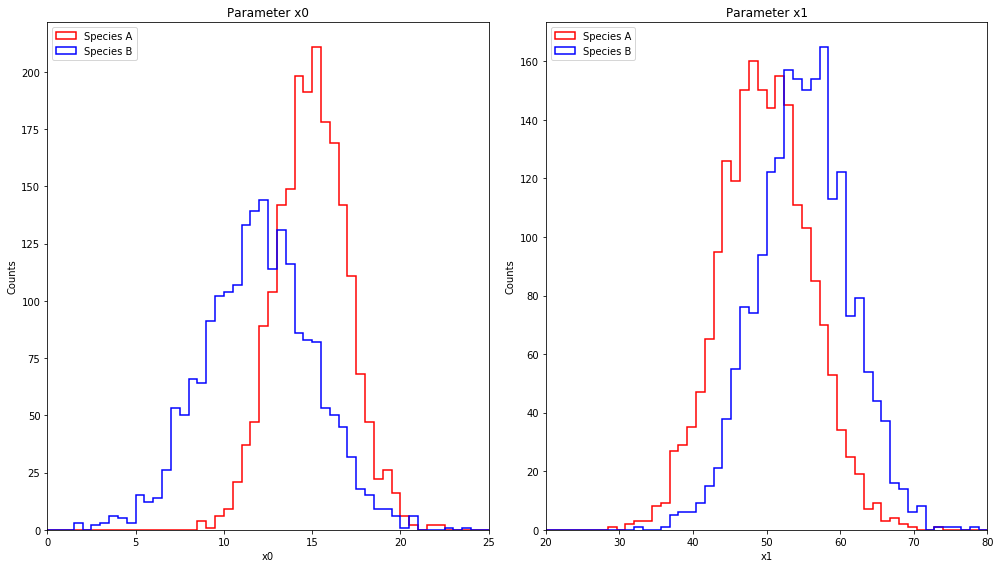

In [7]:
fig_1D, ax_1D = plt.subplots(ncols=2, figsize=(14, 8))

ax_1D[0].hist(spec_A[:, 0], 50, (0, 25), histtype='step', label='Species A', color='Red', lw=1.5)
ax_1D[0].hist(spec_B[:, 0], 50, (0, 25), histtype='step', label='Species B', color='Blue', lw=1.5)
ax_1D[0].set(title='Parameter x0', xlabel='x0', ylabel='Counts', xlim=(0,25))
ax_1D[0].legend(loc='upper left')

# uncomment later
#ax_1D[0].text(1, 176, fr'$\Delta_{{x0}} = {calc_separation(spec_A[:, 0], spec_B[:, 0]):.3f}$', fontsize=16)

ax_1D[1].hist(spec_A[:, 1], 50, (20, 80), histtype='step', label='Species A', color='Red', lw=1.5)
ax_1D[1].hist(spec_B[:, 1], 50, (20, 80), histtype='step', label='Species B', color='Blue', lw=1.5)
ax_1D[1].set(title='Parameter x1', xlabel='x1', ylabel='Counts', xlim=(20, 80))
ax_1D[1].legend(loc='upper left')

# uncomment later
#ax_1D[1].text(22, 140, fr'$\Delta_{{x1}} = {calc_separation(spec_A[:, 1], spec_B[:, 1]):.3f}$', fontsize=16)

fig_1D.tight_layout()

if save_plots :
    fig_1D.savefig('InputVars_1D.pdf', dpi=600)

NOTE: Wait with drawing the 2D distribution, so that you think about the 1D distributions first!

***

From the two 1D figures, it seems that species A and B can be separated to some degree, but not very well. If you were to somehow select cases of species A, then I can imagine a selection as follows:
 - If (x0 > 16) or (x1 < 46) or (x0 > 13 and x1 < 52), then guess / select as A.

Think about this yourself, and discuss with your peers, how you would go about separating A from B based on x0 and x1.

 -----------------------  5-10 minutes later  -----------------------
 
As it is, this type of selection is hard to optimise, especially with more dimensions (i.e. more variables than just x0 and x1). That is why Fisher's linear discriminant, $F$, is very useful. It makes the most separating linear combination of the input variables, and the coefficients can be calculated analytically. Thus, it is fast, efficient, and transparent. And it takes linear correlations into account.

In [8]:
# fig_corr, ax_corr = plt.subplots(figsize=(14, 8))

# ax_corr.scatter(spec_A[:, 0], spec_A[:, 1], color='Red',  s=10, label='Species A')
# ax_corr.scatter(spec_B[:, 0], spec_B[:, 1], color='Blue', s=10, label='Species B')
# ax_corr.set(xlabel='Parameter x0', ylabel='Parameter x1', title='Correlation');

# ax_corr.legend();
# fig_corr.tight_layout()

#if save_plots :
#    fig_corr.savefig('InputVars_2D.pdf', dpi=600)

## Fisher Discriminant calculation:

We want to find $\vec{w}$ defined by:

$$\vec{w} = \left(\Sigma_A + \Sigma_B\right)^{-1} \left(\vec{\mu}_A - \vec{\mu}_B\right)$$  

which we use to project our data into the best separating plane (line in this case) given by:

$$ \mathcal{F} = w_0 + \vec{w} \cdot \vec{x} $$

We start by finding the means and covariance of the individuel species: (__fill in yourself!__)

In [9]:
def FDA(spec_A, spec_B, labels=None):

    mu_A = np.mean(spec_A, 0)
    mu_B = np.mean(spec_B, 0)

    cov_A = np.cov(spec_A.T)
    cov_B = np.cov(spec_B.T)
    cov_sum = cov_A + cov_B

    # inverts cov_sum
    cov_sum_inv = np.linalg.inv(cov_sum)

    wf = np.dot(cov_sum_inv.T, (mu_A - mu_B))

    fisher_data_A = np.dot(wf, spec_A.T)
    fisher_data_B = np.dot(wf, spec_B.T)

    return fisher_data_A, fisher_data_B, wf

In [10]:
mu_A = np.mean(spec_A, 0) # fill in yourself
mu_B = np.mean(spec_B, 0) # fill in yourself
mu_A

array([14.99334106, 49.86073432])

In [11]:
cov_A = np.cov(spec_A.T) # fill in yourself
cov_B = np.cov(spec_B.T) # fill in yourself

In [12]:
cov_sum = cov_A + cov_B
cov_sum

array([[13.3028406 , 26.43979212],
       [26.43979212, 73.8306408 ]])

where `cov_sum` is the sum of the all of the species' covariance matrices. We invert this using scipy's `inv` function.  __Note__: fill in yourself!

In [13]:
# Delete the definition below of cov_sum when you have filled in the cells above:
# cov_sum = np.diag([1, 2])

# Inverts cov_sum
cov_sum_inv = inv(cov_sum)
cov_sum_inv

array([[ 0.26079844, -0.09339559],
       [-0.09339559,  0.04699079]])

We calculate the fisher weights, $\vec{w}$. __Note__: fill in yourself:

In [14]:
wf = np.dot(cov_sum_inv.T, (mu_A - mu_B)) # fill in yourself
wf

array([ 1.26788237, -0.52443996])

We calculate the fisher discriminant, $\mathcal{F}$. __Note__: fill in yourself:

In [15]:
fisher_data_A = np.dot(wf, spec_A.T) # fill in yourself
fisher_data_B = np.dot(wf, spec_B.T) # fill in yourself

and plot it:

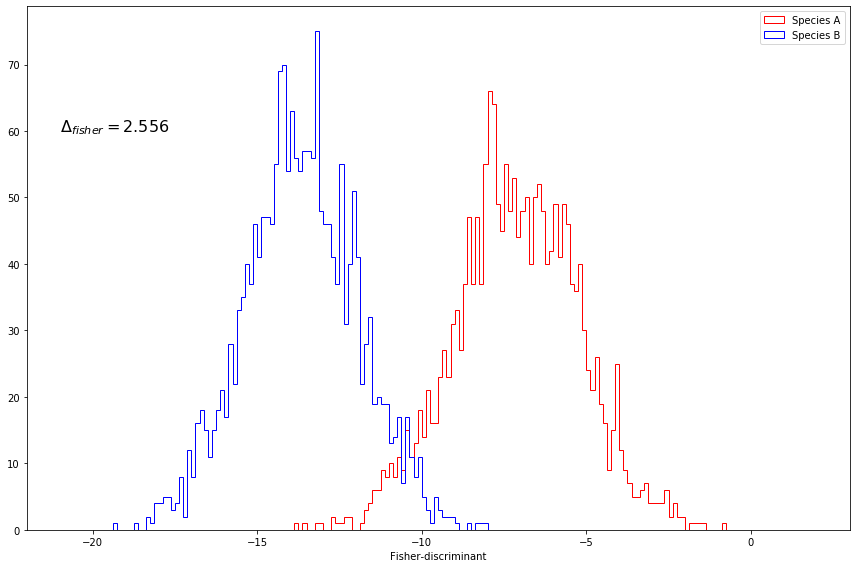

In [16]:
fig_fisher, ax_fisher = plt.subplots(figsize=(12, 8))
fisher_hist_A = ax_fisher.hist(fisher_data_A, 200, (-22, 3), histtype='step', color='Red', label='Species A')
fisher_hist_B = ax_fisher.hist(fisher_data_B, 200, (-22, 3), histtype='step', color='Blue', label='Species B')
ax_fisher.set(xlim=(-22, 3), xlabel='Fisher-discriminant')
ax_fisher.legend()

ax_fisher.text(-21, 60, fr'$\Delta_{{fisher}} = {calc_separation(fisher_data_A, fisher_data_B):.3f}$', fontsize=16)

fig_fisher.tight_layout()

if save_plots:
    fig_fisher.savefig('FisherOutput.pdf', dpi=600)

It is easy to visually see the increased seperation (when done correctly). We can also compare $\Delta_{fisher}$ to $\Delta_{x0}$ or $\Delta_{x1}$ and see it clearly.

# Questions

As always, make sure that you know what the code is doing so far, and what the aim of the exercise is (i.e. which problem to solve, and how). Then start to expand on it. 

1. Look at the 1D distributions of the two discriminating variables for the two species, and see how well you can separate them by eye. It seems somewhat possible, but certainly far from perfect... Once you consider the 2D distribution (scatter plot - to be uncommented by you!), then it is clear, that some cut along a line at an angle will work much better. This exercise is about finding that optimal line, and thus the perpendicular axis to project the data onto!

_Example solution 1:_
Well, all the above is visibly true, and not really a question.

---

2. Calculate the mean, widths (std) and covariance of each discriminating variable (pair of variables for covariance) for each species, and put these into the matrices defined.

_Example solution 2:_
See cell 45-48 for values.

---

3. From the inverted summed matrix and vectors of means, calculate the two Fisher coefficients, and given these, calculate the Fisher discriminant for the two species in question, i.e. $ \mathcal{F} = w_0 + \vec{w} \cdot \vec{x} = w_x \cdot x + w_y \cdot y $ for each point (x,y).

_Example solution 3:_
The fisher coefficients (weights) are calculated in cell 49: $w_A = 1.268$ and $w_B = -0.524$. Given these weights, the fisher value $\mathcal{F}$ can be calculated. The plot shows that they are very well separated.

---

4. What separation did you get, and is it notably better than what you obtain by eye? Also, do your weights make sense? I.e. are they comparable to the widths of the corresponding variable? As a simple measure of how good the separation obtained is, we consider the "distance" between the two distributions as a measure of goodness:  
   
   $$\Delta = \frac{|\mu_A-\mu_B|}{\sqrt{\sigma_A^2+\sigma_B^2}}$$
   
Compare the separation you get from each of the two 1D histograms of $x_0$ and $x_1$ with what you get from the Fisher discriminant, using the above formula. Of course the ultimate comparison should be done using ROC curves!

_Example solution 4:_
The final separation is $\Delta = 2.56$, which corresponds to $2.56 \sigma$ Gaussian separation. Below the corresponding ROC curve can be found.


In [17]:
def calc_ROC(hist1, hist2):

    # hist1 is signal, hist2 is background

    # first we extract the entries (y values) and the edges of the histograms
    y_sig, x_sig_edges, __ = hist1
    y_bkg, x_bkg_edges, __ = hist2

    # Check that the two histograms have the same x edges:
    if np.array_equal(x_sig_edges, x_bkg_edges):

        # extract the center positions (x values) of the bins (doesn't matter if we use signal or background because they are equal)
        x_centers = 0.5*(x_sig_edges[1:] + x_sig_edges[:-1])

        # calculate the integral (sum) of the signal and background
        integral_sig = y_sig.sum()
        integral_bkg = y_bkg.sum()

        # initialize empty arrays for the True Positive Rate (TPR) and the False Positive Rate (FPR).
        TPR = np.zeros_like(y_sig) # True positive rate (sensitivity)
        FPR = np.zeros_like(y_sig) # False positive rate ()

        # loop over all bins (x_centers) of the histograms and calculate TN, FP, FN, TP, FPR, and TPR for each bin
        for i, x in enumerate(x_centers):

            # the cut mask
            cut = (x_centers < x)

            # true positive
            TP = np.sum(y_sig[~cut]) / integral_sig    # True positives
            FN = np.sum(y_sig[cut]) / integral_sig     # False negatives
            TPR[i] = TP / float(TP + FN)                    # True positive rate

            # true negative
            TN = np.sum(y_bkg[cut]) / integral_bkg      # True negatives (background)
            FP = np.sum(y_bkg[~cut]) / integral_bkg     # False positives
            FPR[i] = FP / float(FP + TN)                     # False positive rate

        return FPR, TPR

    else:
        AssertionError("Signal and Background histograms have different bins and ranges")

def plot_ROC(FPR, TPR, labels=None, colors=None, figsize=(12,6), ax=None):

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)


    for i in np.arange(len(FPR)):

        kwargs = {}
        if colors is not None:
            kwargs['color'] = colors[i]
        if labels is not None:
            kwargs['label'] = labels[i]

        ax.plot(FPR[i], TPR[i], **kwargs)


    ax.plot([0,1], [0,1], 'k--')
    if labels is not None:
        ax.legend()
    ax.set(xlabel='False Positive Rate (Background Efficiency)', ylabel='True Positive Rate (Signal Efficiency)', xlim=(0, 1), ylim=(0, 1))

    return ax


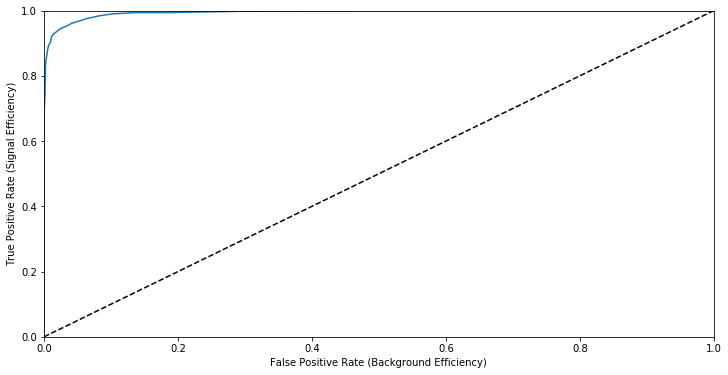

In [18]:
fpr, tpr = calc_ROC(fisher_hist_A, fisher_hist_B)
plot_ROC([fpr,], [tpr,])
